In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import erfc

#### Sigmoid activation function saturation

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

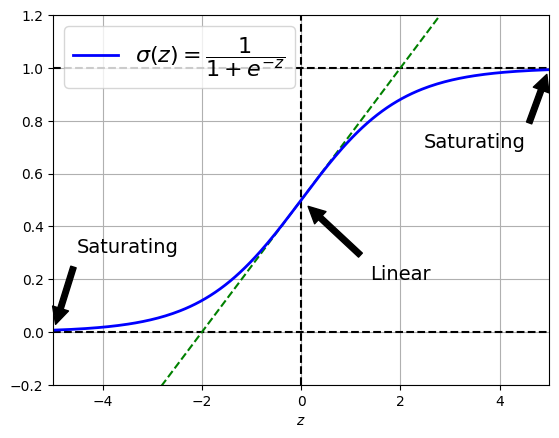

In [4]:
plt.plot([-5, 5], [0, 0], "k--")
plt.plot([-5, 5], [1, 1], "k--")
plt.plot([0, 0], [-0.2, 1.2], "k--")
plt.plot([-5, 5], [-3/4, 7/4], "g--")
plt.plot(z, sigmoid(z), "b-", linewidth=2, label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor="black", shrink=0.1)
plt.annotate("Saturating", xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Saturating", xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate("Linear", xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid()
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

### Xavier and He Initialization

In [8]:
dense = keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal")

In [10]:
he_avg_init = keras.initializers.VarianceScaling(scale=2, mode="fan_avg", distribution="uniform")

dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)

### Better Activations Functions

#### Leaky ReLU

In [13]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)

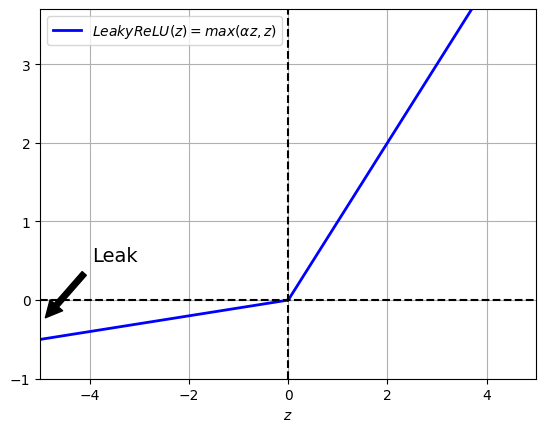

In [20]:
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], "k--")
plt.plot([0, 0], [-1, 3.7], "k--")
props = dict(facecolor="black", shrink=0.1)
plt.annotate("Leak", xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props, fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.grid()
plt.legend()

In [21]:
leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
dense = keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")

In [22]:
model = keras.models.Sequential([
  #...
  keras.layers.Dense(50, kernel_initializer="he_normal"),
  keras.layers.LeakyReLU(alpha=0.2)
  #...
])

#### ELU & SELU

In [27]:
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)

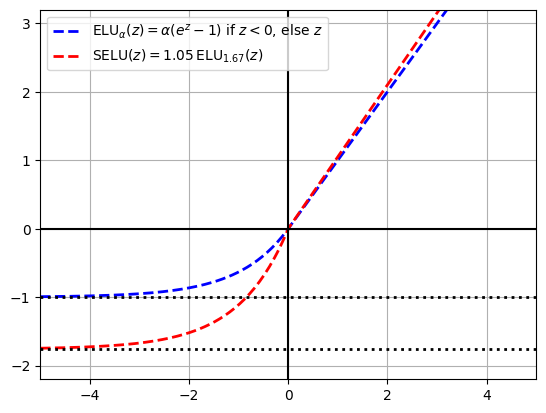

In [37]:
plt.plot(z, elu(z), "b--", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [-1, -1], "k:", linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], "k:", linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], "k-")
plt.grid()
plt.axis([-5, 5, -2.2, 3.2])
plt.legend()

In [38]:
dense = tf.keras.layers.Dense(50, activation="elu", kernel_initializer="he_normal")

In [39]:
dense = tf.keras.layers.Dense(50, activation="selu", kernel_initializer="lecun_normal")

#### GELU, Swish and Mish

In [41]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)
beta = 0.6 

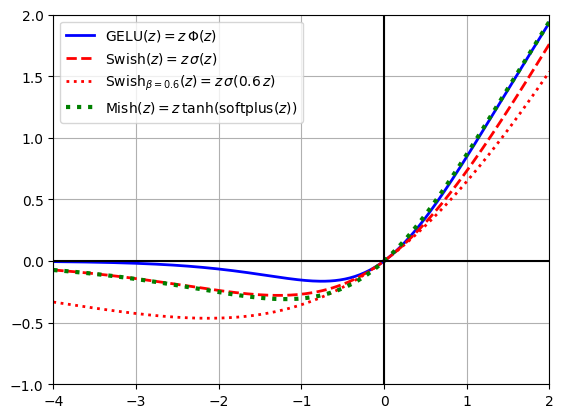

In [49]:
plt.plot(z, approx_gelu(z), "b-", linewidth=2, label=r"GELU$(z) = z\, \Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2, label=r"Swish$(z) = z\, \sigma(z)$")
plt.plot(z,  swish(z, beta), "r:", linewidth=2, label=fr"Swish$_{{\beta={beta}}}(z)=z\, \sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3, label=fr"Mish$(z) = z\, \tanh($softplus$(z))$")

plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.legend()

In [50]:
dense = tf.keras.layers.Dense(50, activation="gelu",
                              kernel_initializer="he_normal")

In [51]:
dense = tf.keras.layers.Dense(50, activation="swish",
                              kernel_initializer="he_normal")

### Batch normalization

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(300, activation="relu",
                       kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100, activation="relu",
                       kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_9 (Dense)             (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [12]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [13]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=[28, 28]),
  
  tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),

  tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("relu"),

  tf.keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235200    
                                                                 
 batch_normalization_3 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               30000     
                                                                 
 batch_normalization_4 (Bat  (None, 100)               400       
 chNormalization)                                     

### Transfer learning

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
pos_class_id = class_names.index('Pullover')
neg_class_id = class_names.index('T-shirt/top')